In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler

Now, we'll authorize our Twitter account using API keys and tokens. They can be extracted from developers.twitter.com/App -> Settings-> Keys & Tokens

In [75]:
consumer_key = "enter your consumer key here"
consumer_secret = "enter your consumer secret key here"
access_token = "enter your access token here"
access_token_secret = "enter your access token secret here"

# Use the above credentials to authenticate the API.

auth = tweepy.OAuthHandler( consumer_key , consumer_secret)
auth.set_access_token( access_token , access_token_secret)
api = tweepy.API(auth)

In [76]:
df = pd.DataFrame(columns=["Date", "User", "IsVerified", "Tweet", "Likes", "RT", "User_location"])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []




## Below is a Function to extract tweets:

## We will use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc.

In [77]:
def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic, count=100, lang="en", exclude='retweets').items():
        print(i, end='\r')
        df.loc[i, "Date"] = tweet.created_at
        df.loc[i, "User"] = tweet.user.name
        df.loc[i, "IsVerified"] = tweet.user.verified
        df.loc[i, "Tweet"] = tweet.text
        df.loc[i, "Likes"] = tweet.favorite_count
        df.loc[i, "RT"] = tweet.retweet_count
        df.loc[i, "User_location"] = tweet.user.location
        
        df.to_csv("TweetDataset.csv",index=False)
        i=i+1
        if i>Count:
            break
        else:
            pass

In [78]:
Topic=["Eminem"]
get_tweets(Topic, Count=100)

In [79]:
df.head(10)

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2022-06-21 02:57:30,Richard Grooms,False,Eminem - Like Toy Soldiers (Official Music Vid...,0,0,
1,2022-06-21 02:57:10,MJ💙Beto4TxBETO!,False,@AllHHSessions I also love Wayne and I love Wa...,0,0,United States
2,2022-06-21 02:56:05,Миша Колчанов,False,@LithiumFinance @SnoopDogg @mcuban @Eminem #67...,0,0,Пермь
3,2022-06-21 02:54:40,Tr0nT,False,"when eminem said ""it's actually disastrously b...",0,0,"Tucson, AZ"
4,2022-06-21 02:52:27,17.25% funny,False,"Already got called Eminem, Post Malone (again)...",0,0,"Wyandotte, MI"
5,2022-06-21 02:52:25,Emily Wood,False,8 Mile | Eminem's Final Rap Battles https://t....,0,0,"Morris, New york"
6,2022-06-21 02:52:06,𝓓𝓙🖤,False,@2900Slattz But Carti&gt;Eminem tho,1,0,;)
7,2022-06-21 02:51:57,Hello World,False,they need Love and care!!!\n#anima #extendthei...,0,0,
8,2022-06-21 02:51:18,Emily Wood,False,Christina Aguilera and Eminem talking about ea...,0,0,"Morris, New york"
9,2022-06-21 02:51:09,Lord Polycarp,False,Eminem X Rihanna - The Monster,1,0,"Nakuru, Kenya"


# **Analyze the Tweets**

In [80]:
import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# Uses of regular expression here:
# (@[A-Za-z0-9]+)   : Delete Anything like @hello @goodbye etc
# ([^0-9A-Za-z \t]) : Delete everything other than text, number, space, tabspace
# (\w+:\/\/\S+)     : Deletes links
# ([RT]) : Remove "RT" from the tweet

In [81]:
# Function to analyze Sentiment

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [82]:
#Function to Pre-process data for Worlcloud:here we are removing the words present in Topic from the Corpus so they dont come in WordCloud.
# Ex : Topic is "Eminem and Dre", we want to remove "Eminem", "and" & "Dre" from the WordCloud.
def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) # Add our topic in Stopwords, so it doesnt appear in wordCloud
  
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    return text_new

In [83]:
# Call function to get Clean tweets
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2022-06-21 02:57:30,Richard Grooms,False,Eminem - Like Toy Soldiers (Official Music Vid...,0,0,,eminem like toy soldiers official music video via
1,2022-06-21 02:57:10,MJ💙Beto4TxBETO!,False,@AllHHSessions I also love Wayne and I love Wa...,0,0,United States,i also love wayne and i love wayne s colabs es...
2,2022-06-21 02:56:05,Миша Колчанов,False,@LithiumFinance @SnoopDogg @mcuban @Eminem #67...,0,0,Пермь,6723 this is the coolest pepper in the rap world
3,2022-06-21 02:54:40,Tr0nT,False,"when eminem said ""it's actually disastrously b...",0,0,"Tucson, AZ",when eminem said it s actually disastrously ba...
4,2022-06-21 02:52:27,17.25% funny,False,"Already got called Eminem, Post Malone (again)...",0,0,"Wyandotte, MI",already got called eminem post malone again an...


In [84]:
# Call function to get the Sentiments
df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet,Sentiment
0,2022-06-21 02:57:30,Richard Grooms,False,Eminem - Like Toy Soldiers (Official Music Vid...,0,0,,eminem like toy soldiers official music video via,Neutral
1,2022-06-21 02:57:10,MJ💙Beto4TxBETO!,False,@AllHHSessions I also love Wayne and I love Wa...,0,0,United States,i also love wayne and i love wayne s colabs es...,Positive
2,2022-06-21 02:56:05,Миша Колчанов,False,@LithiumFinance @SnoopDogg @mcuban @Eminem #67...,0,0,Пермь,6723 this is the coolest pepper in the rap world,Neutral
3,2022-06-21 02:54:40,Tr0nT,False,"when eminem said ""it's actually disastrously b...",0,0,"Tucson, AZ",when eminem said it s actually disastrously ba...,Negative
4,2022-06-21 02:52:27,17.25% funny,False,"Already got called Eminem, Post Malone (again)...",0,0,"Wyandotte, MI",already got called eminem post malone again an...,Negative


In [85]:
n = 15
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 @ShadyFansite @Eminem Hi smile Em ❤️‍🔥❤️‍🔥

Clean tweet:
 hi smile em

Sentiment of the tweet:
 Positive


In [86]:
print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['Eminem'] are : 101
Total Positive Tweets are : 29
Total Negative Tweets are : 15
Total Neutral Tweets are : 57


In [87]:
df["Sentiment"].value_counts()

Neutral     57
Positive    29
Negative    15
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets')

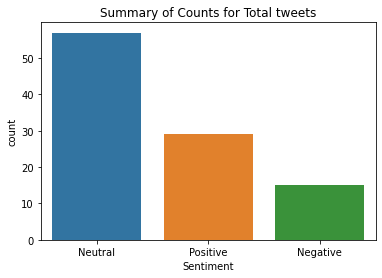

In [88]:
sns.countplot(df["Sentiment"])
plt.title("Summary of Counts for Total tweets")

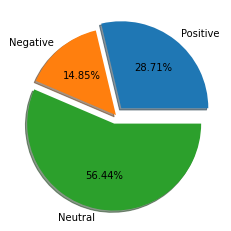

In [89]:
a=len(df[df["Sentiment"]=="Positive"])
b=len(df[df["Sentiment"]=="Negative"])
c=len(df[df["Sentiment"]=="Neutral"])
d=np.array([a,b,c])
explode = (0.1, 0.0, 0.1)
plt.pie(d,shadow=True,explode=explode,labels=["Positive","Negative","Neutral"],autopct='%1.2f%%');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not')

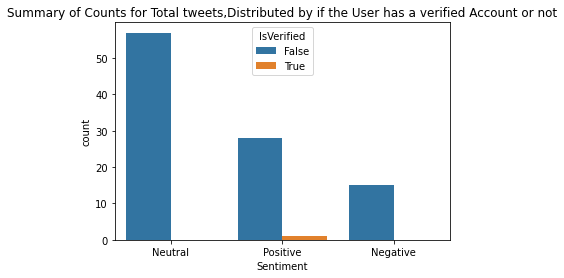

In [90]:
sns.countplot(df["Sentiment"],hue=df.IsVerified)
plt.title("Summary of Counts for Total tweets,Distributed by if the User has a verified Account or not")

# **Generate WordCloud**

In [91]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

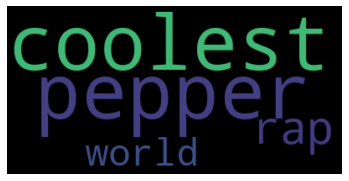

In [92]:
text = df.clean_tweet[2]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=10).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **WordCloud for whole data (Topic not included in WordCloud)**

There are 6613 words in the combination of all review.


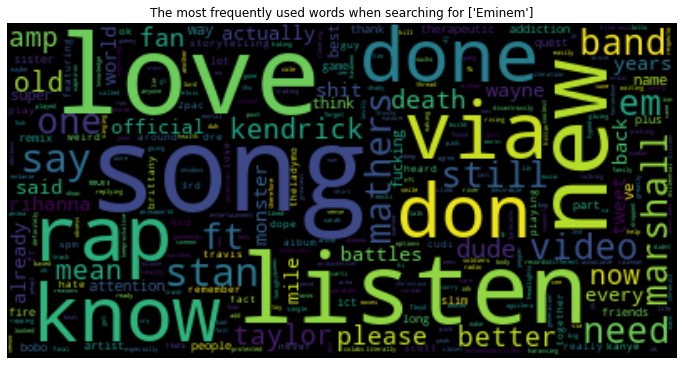

In [93]:
# Combine all reviews into one big text and create a Cloud to see which Words are most common in these Tweets.

text = " ".join(review for review in df.clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

text_newALL = prepCloud(text,Topic)


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_newALL)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic),)
plt.axis("off")
plt.show()

## **For Positive and Negative**

**For Positive**

There are 6613 words in the combination of all review.


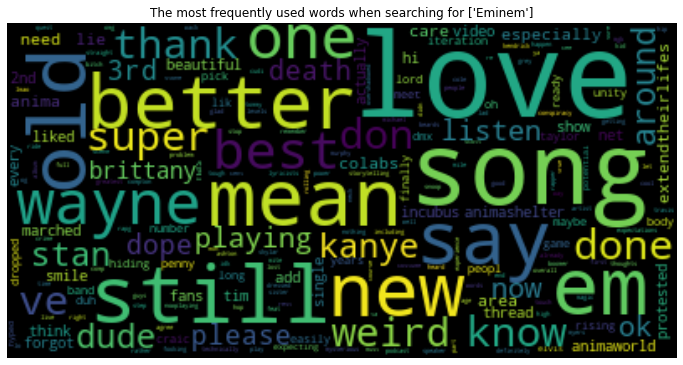

In [94]:
text_positive = " ".join(review for review in df[df["Sentiment"]=="Positive"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords
#text_positive=" ".join([word for word in text_positive.split() if word not in stopwords])

text_new_positive = prepCloud(text_positive,Topic)

#stopwords.update(["drink", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_positive)

# Display the generated image:
# the matplotlib way:


plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()

**For Negative**

There are 6613 words in the combination of all review.


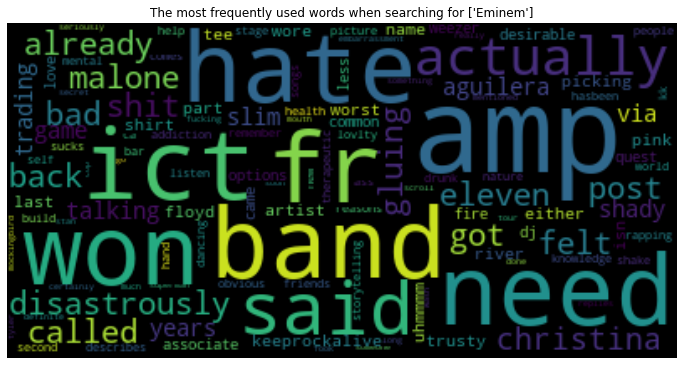

In [96]:
text_negative = " ".join(review for review in df[df["Sentiment"]=="Negative"].clean_tweet)
print ("There are {} words in the combination of all review.".format(len(text)))


# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["and", "now", "wine", "flavor", "flavors"])  #To add any custom StopWords

#text_negative=" ".join([word for word in text_negative.split() if word not in stopwords])
text_new_negative = prepCloud(text_negative,Topic)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_words=800,max_font_size=70).generate(text_new_negative)

# Display the generated image:
# the matplotlib way:

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("The most frequently used words when searching for {}".format(Topic))
plt.axis("off")
plt.show()